In this project I am building a machine learning model that predicts whether an employee is likely to leave the company.

### Objective:
- Predict employee atrrition based on various features such as job satisfication, work-life-balance,environment satisfaction and income.
- Explore important factors that influence attrition.
- Evaluate model performance using classification metrics.

### Dataset Overview
It contains information of about 1,470 employees with the following features:
- Demographics: Age, Gender, Marital status
- Job-related
- Satisfication Scores: by environment, job satisfication, work-life-balance
- Attrition Label: Yes/ No

### Key Tools & Libraries
- Pandas, Matplotlib, Seaborn for EDA
- Scikit-learn, XGBoost and Logistic Regression for modelling
- SMOTE for sampling and more

 **Note:** I have used the same dataset for another project, but the focus here is shifted to **predictive modeling and interpretability**.




In [1]:
# import relavant libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the Data 

In [2]:
data = pd.read_csv(r"C:\Users\qndlovu\Data Science source data\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Data Analysis
 - Understand the source and context of the dataset.
 - Examine the structure, including its shape and columns.
 - Check the data types of each column and review descriptive statistics.

In [4]:
pd.set_option("display.max_columns",None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Descriprive analysis

In [5]:
data.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Does the data contain any duplicates?

data.duplicated().value_counts()  # returns True for duplicate rows

False    1470
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Look for null values in the data 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Learning about data
- The dataset contains only the Integers and Object(10/35) data types
- There are no null values in the dataset
  

# The y Variable(Attrition)

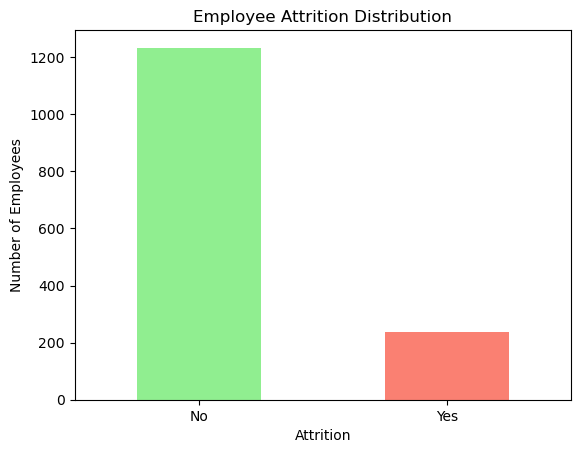

In [9]:
counts = data['Attrition'].value_counts()
counts.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()


# The Attrition(y) variable shows imbalance, We will balance the data using #scale_pos_weight. in (1)

In [10]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


# Attrition in other Features(Education, Department,Age ..etc)

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

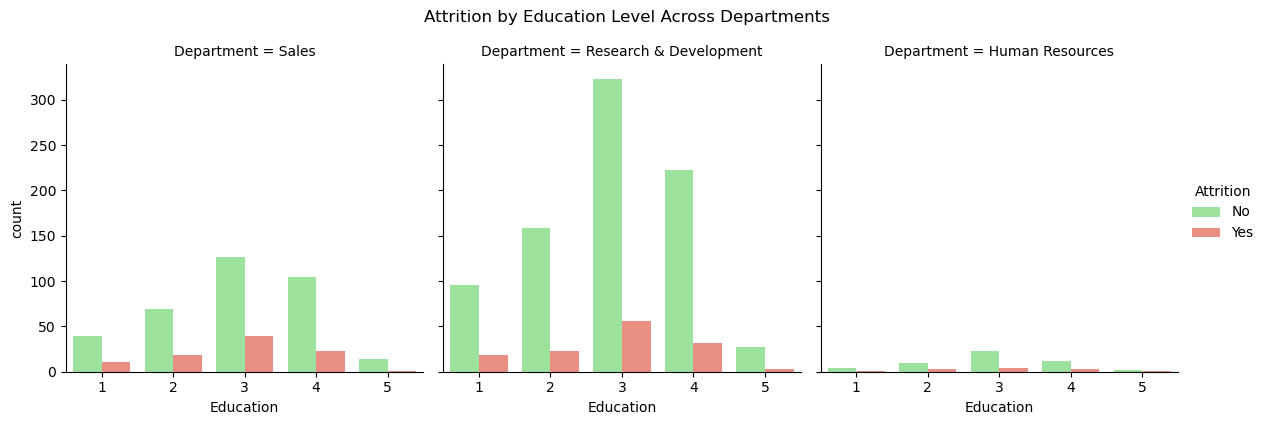

In [11]:
g = sns.catplot(
    x='Education', 
    hue='Attrition', 
    col='Department',
    data=data, 
    kind='count', 
    palette=['lightgreen', 'salmon'],
    col_wrap=3,  
    height=4,
    aspect=1
)

g.fig.suptitle('Attrition by Education Level Across Departments', y=1.05)
plt.show()


In [12]:
# Filter for employees who left
attr_data = data[data['Attrition'] == 'Yes']

#Group by department and count attrition
attr_count = attr_data['Department'].value_counts()
attr_count


Department
Research & Development    133
Sales                      92
Human Resources            12
Name: count, dtype: int64

# Attrition rate by Group Age 
- First make Age in groups for better visualisation

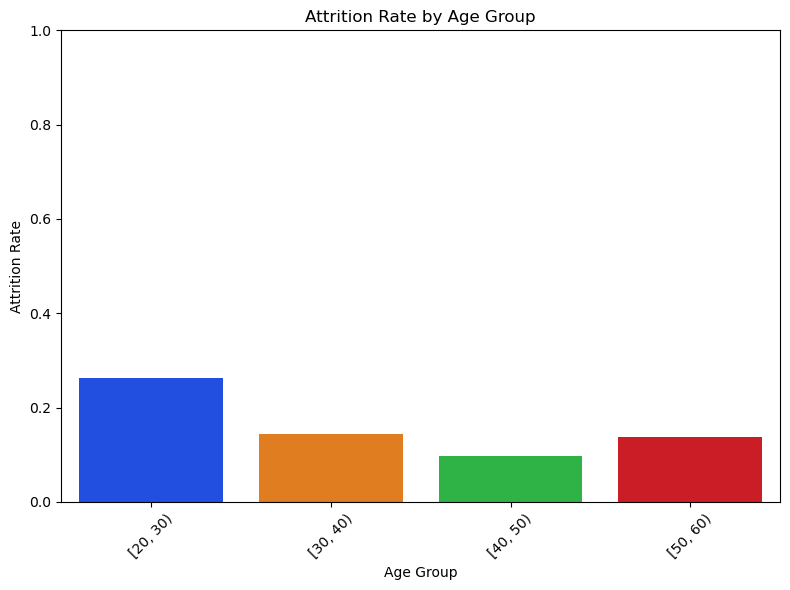

In [13]:
# Create age groups, 20-29,30-39 ...-n)
data['Age_Group'] = pd.cut(data['Age'], bins=range(20, 70, 10), right=False)

# Calculate attrition rate by age group
attrition_rate = data.groupby('Age_Group', observed=True)['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()
attrition_rate.columns = ['Age_Group', 'Attrition_Rate']

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=attrition_rate, x='Age_Group', y='Attrition_Rate', hue='Age_Group', palette='bright', legend=False)
plt.title('Attrition Rate by Age Group')
plt.ylabel('Attrition Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# What the Attrition data says:
The Research & Development department has many employees and also the attrition is high. 
Most employees who left are on level 03 Education to 04.
Most employees who left are young employees, aged between 20 to 30 with about 29% atrrition.

In [16]:
from sklearn.model_selection import train_test_split

# Convert attrition column to binary(0 and 1)
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})
if data['Attrition'].isnull().any():
    raise ValueError("Some values in 'Attrition' could not be mapped to 0/1.")


In [17]:
# Drop target variable and multicollinear or redundant features
columns_to_drop = ['Attrition', 'EmployeeNumber', 'Over18', 'StandardHours',
                   'EmployeeCount', 'EmployeeID', 'DailyRate', 'HourlyRate']

# Choose the X and y variable
X = data.drop(columns=columns_to_drop, errors='ignore') 

y = data['Attrition']

# (1) Deal with imbalanced Data

# Pipeline with XGboost and Preprocessing
scale_pos_weight = number of negative samples / number of positive samples

to keep the code clean and reproducible, a Pipeline will be used.
below is a sickit-learn pipeline with XGBoost, including handling class imbalance and preprocessing.

# Steps of building  a pipeline
1. Define preprocessing steps
2. Define the model
3. Create and evaluate the pipeline

# step 1

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Seperate features by data type
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
                                     ])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical data and categorical data 
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [20]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


# Step 2

In [21]:
# Define the model, import XGBClassifier since it's classification problem
from xgboost import XGBClassifier

# Calculate scale_pos_weight
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# Define the XGBoost classifier
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

# Step 3

In [25]:
from sklearn.metrics import classification_report

# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Model 
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# Pipeline with SMOTE
smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])

# Param grid for tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Train
grid_search.fit(X_train, y_train)

# Evaluate best model
print("Best Parameters Found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters Found:
{'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.76      0.34      0.47        47

    accuracy                           0.88       294
   macro avg       0.82      0.66      0.70       294
weighted avg       0.87      0.88      0.86       294



In [37]:
# Threshold tuning:
y_proba = best_model.predict_proba(X_test)[:, 1]
threshold = 0.2
y_pred_new = (y_proba >= threshold).astype(int)
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.43      0.43      0.43        47

    accuracy                           0.82       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.82      0.82      0.82       294



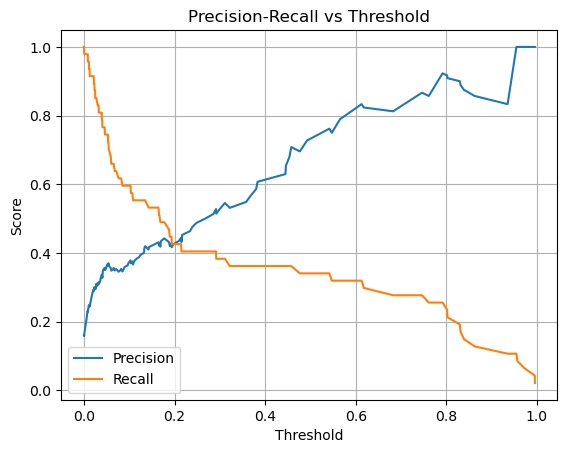

In [38]:
# Visualise Precision-Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# Try Random Forest 

In [35]:
from sklearn.ensemble import RandomForestClassifier

# The random Forest pipeline
rf_model = RandomForestClassifier(random_state=42)

rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_model)
])

rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_leaf': [1, 5]
}

rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit the random forest model 
rf_grid_search.fit(X_train, y_train)

print("Best RF parameters:")
print(rf_grid_search.best_params_)

# Evaluate RandomForest on test set
y_pred_rf = rf_grid_search.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RF parameters:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.50      0.28      0.36        47

    accuracy                           0.84       294
   macro avg       0.69      0.61      0.63       294
weighted avg       0.81      0.84      0.82       294



# Observations:
(i) Recall is quite low, the model misses a large portion of atrrition classes, which is critical
(ii) F1-score shows poor balance between precision and recall for the minority class.
(iii) Precision moderate for minority class 
(iv)  Accuracy is high, but this can be misleading because there is class imbalance

# Random Forest Threshold Tuning 

In [39]:
y_proba_rf = rf_grid_search.predict_proba(X_test)[:, 1]
threshold = 0.2
y_pred_rf_new = (y_proba_rf >= threshold).astype(int)
print(classification_report(y_test, y_pred_rf_new))


              precision    recall  f1-score   support

           0       0.95      0.67      0.79       247
           1       0.32      0.81      0.46        47

    accuracy                           0.69       294
   macro avg       0.63      0.74      0.62       294
weighted avg       0.85      0.69      0.73       294



After tuning the threshold, there is some improvement in the model

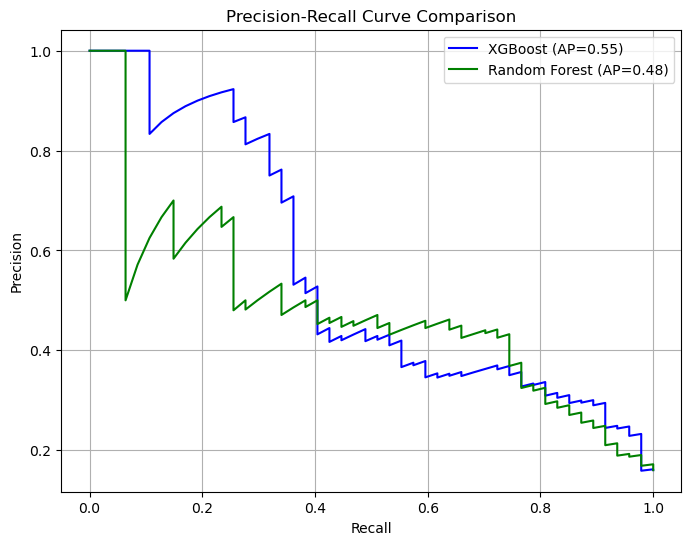

In [40]:
from sklearn.metrics import average_precision_score

# Get predicted probabilities for the positive class (attrition=1)
y_proba_xgb = best_model.predict_proba(X_test)[:, 1]  # XGBoost best estimator
y_proba_rf = rf_grid_search.predict_proba(X_test)[:, 1]  # Random Forest best estimator

# Calculate the precision-recall curve and average precision score for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
ap_xgb = average_precision_score(y_test, y_proba_xgb)

# calculate the precision-recall curve and Average precision for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
ap_rf = average_precision_score(y_test, y_proba_rf)

# Plot 
plt.figure(figsize=(8,6))
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP={ap_xgb:.2f})', color='blue')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP={ap_rf:.2f})', color='green')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


Conclusin:
RF performed slighly worse than XGBoost overall but still offered valuable insights and complementary perspective.